# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [86]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [87]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | san andres
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | harstad
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | khawr fakkan
Processing Record 13 of Set 1 | burang
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | argo
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | oranjemund
Processing Record 21 of Set 1 | grand

In [88]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [89]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,15.16,94,75,3.60,ZA,1691531785
1,talnakh,69.4865,88.3972,13.45,62,94,1.03,RU,1691532343
2,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691532343
3,san andres,12.5847,-81.7006,31.01,74,40,5.14,CO,1691532260
4,wailua homesteads,22.0669,-159.3780,33.24,75,100,8.23,US,1691532343


In [90]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [91]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.16,94,75,3.60,ZA,1691531785
1,talnakh,69.4865,88.3972,13.45,62,94,1.03,RU,1691532343
2,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691532343
3,san andres,12.5847,-81.7006,31.01,74,40,5.14,CO,1691532260
4,wailua homesteads,22.0669,-159.3780,33.24,75,100,8.23,US,1691532343


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

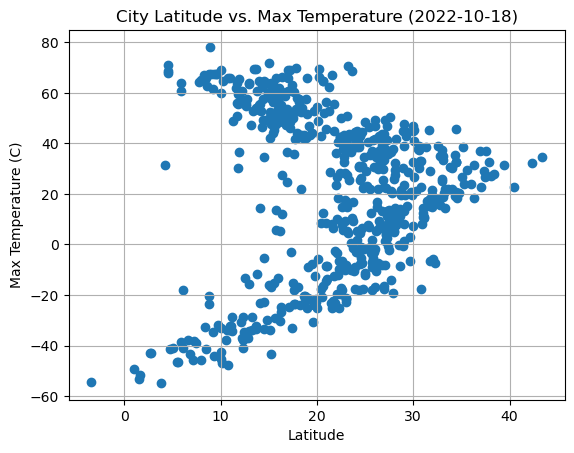

In [92]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

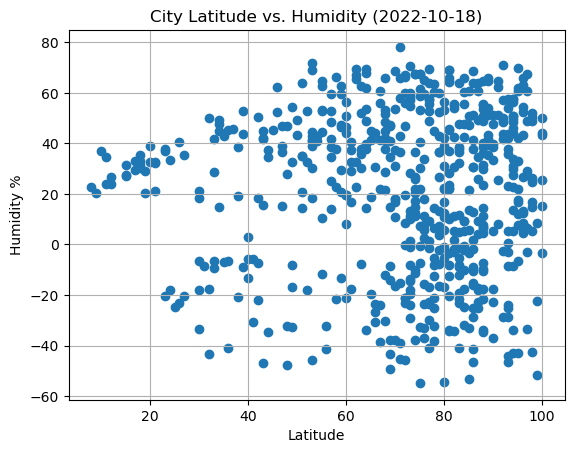

In [93]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

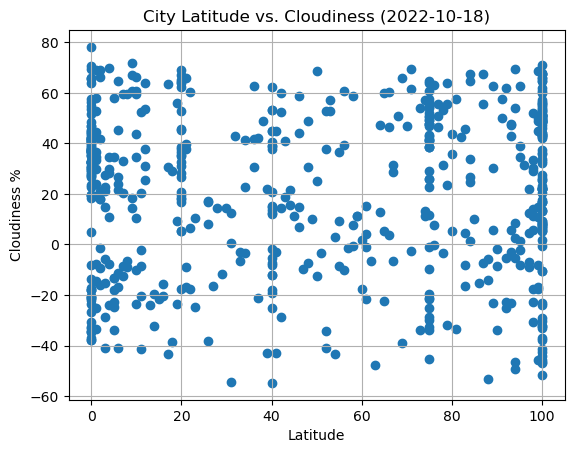

In [94]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

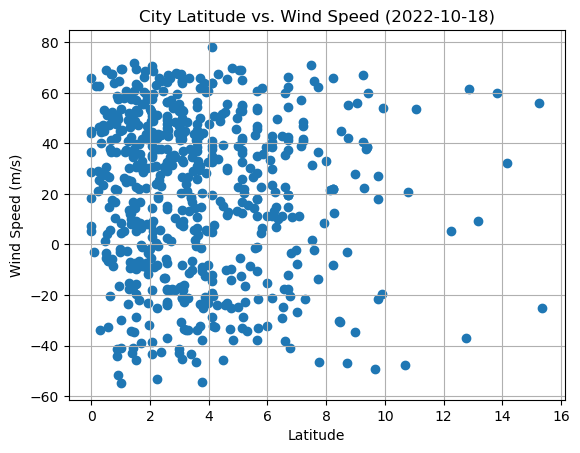

In [95]:
plt.scatter(city_data_df['Wind Speed'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [96]:
# Define a function to create Linear Regression plots
def linregress(x, y):
    r = st.pearsonr(x, y)
    print(f'The r-value is: {r[0]}')
    
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress = x * slope + intercept
    line = 'y = {slope: .2f}x + {intercept: .2f}'
    
    plt.annotate(line, color = 'red')
    plt.scatter(x, y)
    plt.plot(x, regress)
    

In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,13.45,62,94,1.03,RU,1691532343
3,san andres,12.5847,-81.7006,31.01,74,40,5.14,CO,1691532260
4,wailua homesteads,22.0669,-159.3780,33.24,75,100,8.23,US,1691532343
6,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691532306
8,harstad,68.7990,16.5293,23.66,86,99,2.11,NO,1691532344


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,11.56,82,0,5.32,ZA,1691530558
3,blackmans bay,-43.0167,147.3167,3.07,94,39,2.98,AU,1691530554
6,avarua,-21.2078,-159.7750,23.03,60,20,3.60,CK,1691530557
9,waitangi,-43.9535,-176.5597,8.23,95,100,0.45,NZ,1691530555
13,wewak,-3.5534,143.6268,25.93,86,45,2.61,PG,1691531056


###  Temperature vs. Latitude Linear Regression Plot

In [81]:
# Linear regression on Northern Hemisphere
linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.6638556142227533
The r-value is: -0.663855614

RecursionError: maximum recursion depth exceeded while calling a Python object

The r-value is: 0.4121057168607245


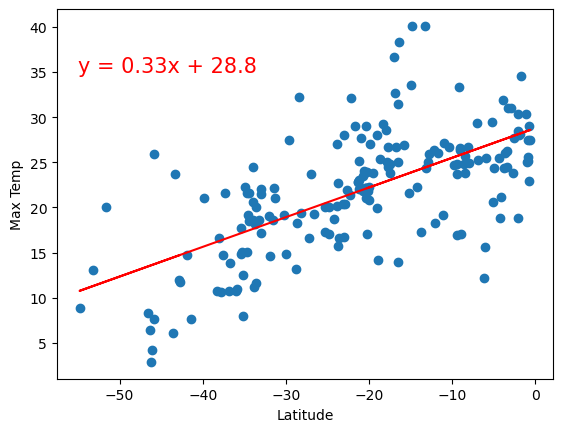

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


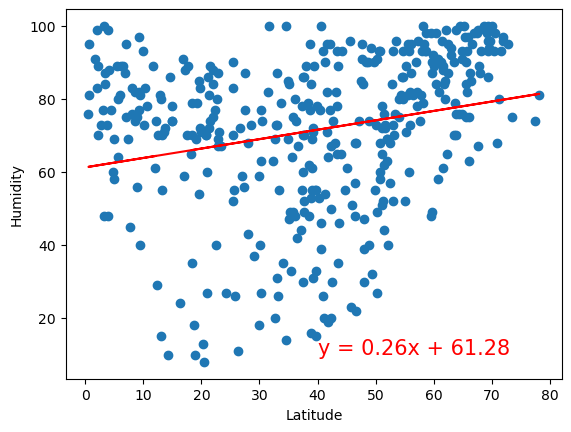

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


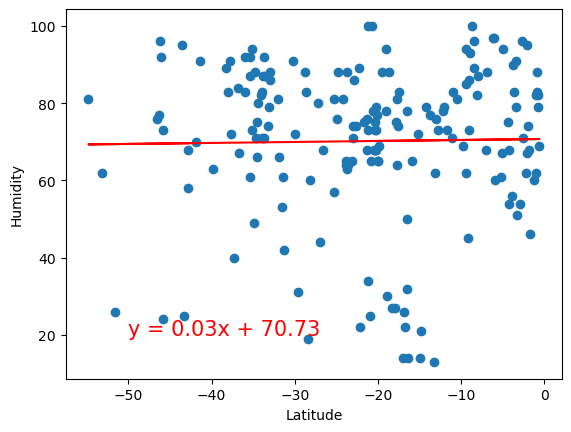

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


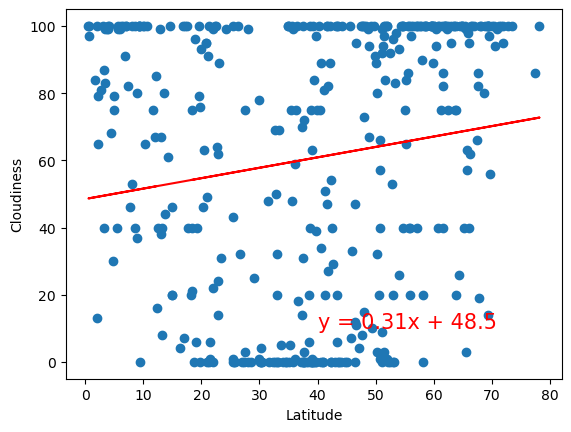

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


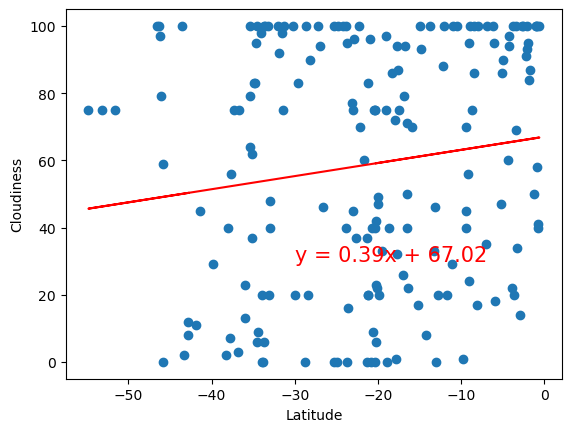

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


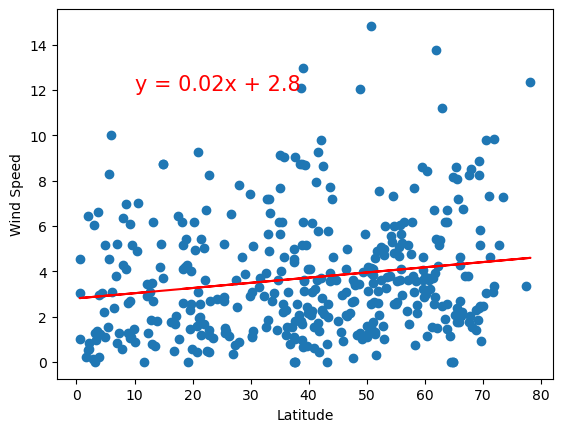

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


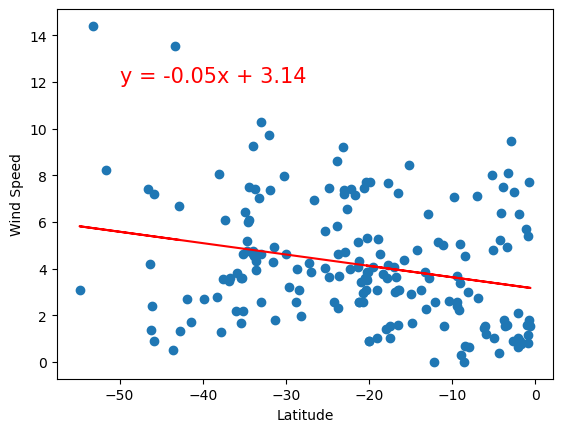

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE